# Pymaceuticals Inc.
---

### Analysis

While reviewing the data for mice / drug regimens, one can conclude the following:
All drugs performed with generally the same results, however Capomulin and Ramicane performed a little better than the group, and Propriva did not perform as well as the others by only a small margin. 
The distribution of gender is about equal, however males had a few more; 50.6% vs 49.4%
In terms of statistical data, Infubinol was the only drug with an outlier. 
The mouse's tumor I targeted individual analytical data for shows a positive correlation between time on drug and tumor size, however if we want to see the tumor shrinking in size as the time goes on, this did not provide those results; the tumor only shrunk between days 0-5.
There is a positive correlation between between weight of the mice and average tumor volume. 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
#print(mouse_metadata)
#print(study_results)
total_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice.
mouse_counts = total_df["Mouse ID"].unique()
mice_count=len(mouse_counts)
mice_count

249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = (total_df[["Mouse ID", "Timepoint"]])
mouse_g989 = mouse_duplicate[mouse_duplicate["Mouse ID"] == "g989"]
mouse_g989.head()

,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = total_df[total_df["Mouse ID"] == "g989"]
g989.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = total_df.drop_duplicates(subset=["Mouse ID"])
clean_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_counts = clean_mouse["Mouse ID"].unique()
clean_count = len(clean_counts)
clean_count

249

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_drug = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stat_summary = pd.DataFrame({"mean": mean_drug,
                            "median": median_drug,
                            "var": var_drug,
                            "std": stdev_drug,
                            "sem": sem_drug})
stat_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     160
Name: Drug Regimen, dtype: int64

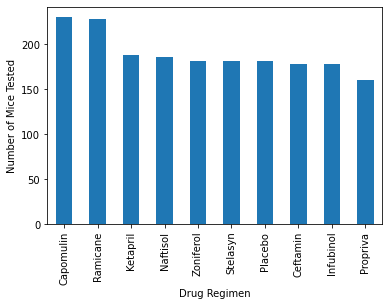

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_reg_count = clean_mouse["Drug Regimen"].value_counts()
drug_reg_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
#plt.show()
drug_reg_count

Text(0, 0.5, 'Number of Mice Tested')

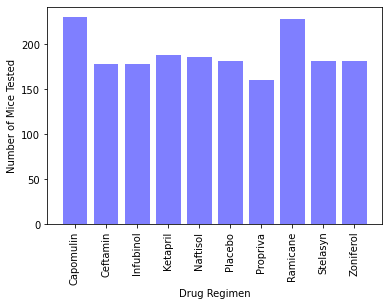

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint = clean_mouse[["Drug Regimen","Timepoint"]]
timepoint = timepoint.groupby("Drug Regimen").count()
timepoint
x_axis = np.arange(len(timepoint))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, timepoint["Timepoint"], color="b", alpha=0.5, align="center")
plt.xticks(tick_locations, timepoint.index, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Sex')

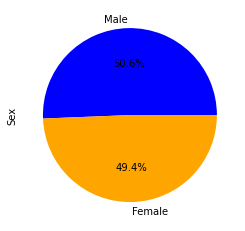

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_mouse["Sex"].value_counts()
colors = ["blue", "orange"]
plt.pie(sex.values, labels=sex.index.values, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")


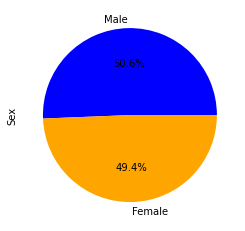

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_mouse["Sex"].value_counts()
colors = ["blue", "orange"]
sex.plot(kind="pie", y = "Mouse ID", colors = colors, autopct="%1.1f%%" )


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = clean_mouse.groupby("Mouse ID")["Timepoint"].max()
final_vol = final_vol.reset_index()
final_vol
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = final_vol.merge(total_df, on=["Mouse ID", "Timepoint"], how="left")
new_df.head()

#new_df["Drug Regimen"].unique()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_count = new_df.loc[new_df["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_count)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_count.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq +(1.5*iqr)
    outliers = tumor_count.loc[(tumor_count < lower_bound) | (tumor_count > upper_bound)]

    print(f"{drugs}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



Text(0, 0.5, 'Tumor Volume (mm3)')

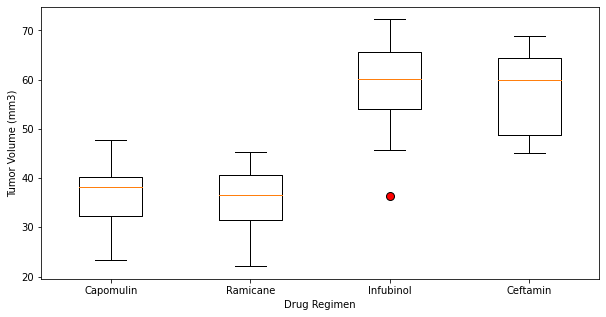

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,5))
outlier_colors = dict(markerfacecolor = "red", markersize=8)

plt.boxplot(tumor_vol_data, labels=drug_regimens, flierprops=outlier_colors)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment for mouse i557')

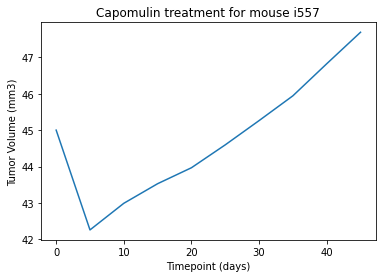

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
#capomulin_df
mouse_i557 = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
#mouse_i557
x_axis = mouse_i557["Timepoint"]
y_axis = mouse_i557["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment for mouse i557")

Text(0, 0.5, 'Weight (g)')

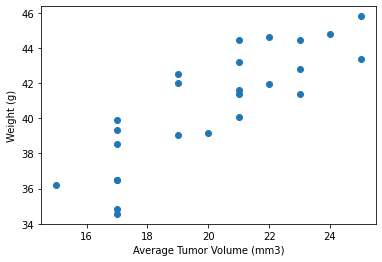

In [19]:
capomulin_mean = capomulin_df.groupby("Mouse ID").mean()
#capomulin_df
plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.7088568047708717


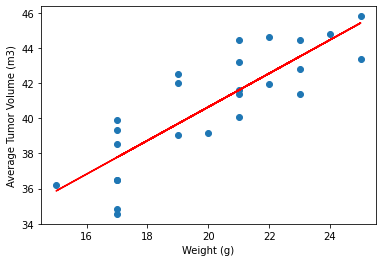

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean["Weight (g)"]
y_values = capomulin_mean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (m3)")
#capomulin_df
print(f"The correlation between mouse weight and average tumor volume is {rvalue**2}")
plt.show()
